# CTG Quantitative Analysis #2: The relationship between fluency (perplexity) and control (BERT accuracy)

In [1]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
from pdb import set_trace
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# GLOBAL VARIABLES
PLOT_DIMS = (11.7, 8.27)
TITLE_SIZE = 30
LABEL_SIZE = 25
TICK_SIZE=20
CI=95
ERR_STYLE='bars'

In [3]:
# # read csv of ctg results of a certain configuration/pplm-setups
# # best performing GPT2-discrim and GPT2-bow
# gpt2_disc_unp_y = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_young_WS.csv", encoding="utf-8")
# gpt2_disc_unp_o = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_old_WS.csv", encoding="utf-8")
# gpt2_bow_fb85_y = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
# gpt2_bow_fb85_o = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")
# # And DGPT-discrim prompted
# dgpt_disc_pr_y = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_young_WS.csv")
# dgpt_disc_pr_o = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_old_WS.csv")

In [4]:
# Neutral prompted results (models considered for analyses)
# GPT2-Discrim
gpt2_disc_np_y = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_discrim_pm_gpt2-medium_prompt_neutral_wl_NA_age_young_WS.csv", encoding="utf-8")
gpt2_disc_np_o = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_discrim_pm_gpt2-medium_prompt_neutral_wl_NA_age_old_WS.csv", encoding="utf-8")

# GPT2-BoW-FB
gpt2_bow_fb_np_y = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
gpt2_bow_fb_np_o = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")

# DGPT-Discrim
dgpt_disc_np_y = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_NA_age_young_WS.csv", encoding="utf-8")
dgpt_disc_np_o = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_NA_age_old_WS.csv", encoding="utf-8")

# DGPT-BoW-MIU
dgpt_bow_miu_np_y = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_young_age_young_WS.csv", encoding="utf-8")
dgpt_bow_miu_np_o = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_old_age_old_WS.csv", encoding="utf-8")

In [5]:
# Other model outputs
gpt2_baseline = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_discrim_pm_gpt2-medium_prompt_neutral_wl_NA_age_NA_WS_baseline.csv", encoding="utf-8")
dgpt_baseline = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_NA_age_NA_WS_baseline.csv", encoding="utf-8")


gpt2_bow_miu_y = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_young_age_young_WS.csv", encoding="utf-8")
gpt2_bow_miu_o = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_old_age_old_WS.csv", encoding="utf-8")
gpt2_100mcw = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_rb_ws_100_most_common_age_young_WS.csv", encoding="utf-8")

dgpt_bow_fb_y = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
dgpt_bow_fb_o = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")
dgpt_100mcw = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_rb_ws_100_most_common_age_young_WS.csv", encoding="utf-8")


In [6]:
# Drop first 30 rows because sequences too short
gpt2_disc_np_y = gpt2_disc_np_y.iloc[30:] 
gpt2_disc_np_o = gpt2_disc_np_o.iloc[30:]

gpt2_bow_fb_np_y = gpt2_bow_fb_np_y.iloc[30:]
gpt2_bow_fb_np_o = gpt2_bow_fb_np_o.iloc[30:]

dgpt_disc_np_y = dgpt_disc_np_y.iloc[30:]
dgpt_disc_np_o = dgpt_disc_np_o.iloc[30:]

dgpt_bow_miu_np_y = dgpt_bow_miu_np_y.iloc[30:]
dgpt_bow_miu_np_o = dgpt_bow_miu_np_o.iloc[30:]

In [7]:
gpt2_baseline =gpt2_baseline.iloc[30:]
dgpt_baseline =dgpt_baseline.iloc[30:]

gpt2_bow_miu_y = gpt2_bow_miu_y.iloc[30:]
gpt2_bow_miu_o = gpt2_bow_miu_o.iloc[30:]
gpt2_100mcw = gpt2_100mcw.iloc[30:]
dgpt_bow_fb_y = dgpt_bow_fb_y.iloc[30:]
dgpt_bow_fb_o = dgpt_bow_fb_o.iloc[30:]
dgpt_100mcw = dgpt_100mcw.iloc[30:]

In [8]:
# Verify that perplexities agree with table in overleaf
print("GPT2-Disc Y/O ppl")
print(gpt2_disc_np_y.perplexity.mean())
print(gpt2_disc_np_o.perplexity.mean())

print("GPT2-BoW-FB Y/O ppl")
print(gpt2_bow_fb_np_y.perplexity.mean())
print(gpt2_bow_fb_np_o.perplexity.mean())

print("DGPT-Disc Y/O ppl")
print(dgpt_disc_np_y.perplexity.mean())
print(dgpt_disc_np_o.perplexity.mean())

print("DGPT-BoW-MIU Y/O ppl")
print(dgpt_bow_miu_np_y.perplexity.mean())
print(dgpt_bow_miu_np_o.perplexity.mean())

GPT2-Disc Y/O ppl
32.0906511147817
47.149694545561495
GPT2-BoW-FB Y/O ppl
27.91258231268989
27.583914594297056
DGPT-Disc Y/O ppl
42.005378170084334
41.17472008599175
DGPT-BoW-MIU Y/O ppl
38.66622588546188
37.90971698054561


In [9]:
def add_correct_col(prob):
    '''
    Adds column to ctg results dataframe indicating if BERT correctly classified generated sequence. 1 if correct, 0 otherwise.
    Args:
        prob (float): assigned probability of belonging to relevant age group
    '''
    
    assert 0 <= prob <= 1
    
    return 1 if prob >= 0.5 else 0
    

In [10]:
# Add correct column
gpt2_disc_np_y['correct'] = gpt2_disc_np_y['young_prob'].apply(add_correct_col)
gpt2_disc_np_o['correct'] = gpt2_disc_np_o['old_prob'].apply(add_correct_col)

gpt2_bow_fb_np_y['correct'] = gpt2_bow_fb_np_y['young_prob'].apply(add_correct_col)
gpt2_bow_fb_np_o['correct'] = gpt2_bow_fb_np_o['old_prob'].apply(add_correct_col)

dgpt_disc_np_y['correct'] = dgpt_disc_np_y['young_prob'].apply(add_correct_col)
dgpt_disc_np_o['correct'] = dgpt_disc_np_o['old_prob'].apply(add_correct_col)

dgpt_bow_miu_np_y['correct'] = dgpt_bow_miu_np_y['young_prob'].apply(add_correct_col)
dgpt_bow_miu_np_o['correct'] = dgpt_bow_miu_np_o['old_prob'].apply(add_correct_col)

In [11]:
print("GPT2-Disc Y/O acc")
print(gpt2_disc_np_y.correct.mean())
print(gpt2_disc_np_o.correct.mean())

print("GPT2-BoW-FB Y/O acc")
print(gpt2_bow_fb_np_y.correct.mean())
print(gpt2_bow_fb_np_o.correct.mean())

print("DGPT-Disc Y/O acc")
print(dgpt_disc_np_y.correct.mean())
print(dgpt_disc_np_o.correct.mean())

print("DGPT-BoW-MIU Y/O acc")
print(dgpt_bow_miu_np_y.correct.mean())
print(dgpt_bow_miu_np_o.correct.mean())

GPT2-Disc Y/O acc
0.6777777777777778
0.7434944237918215
GPT2-BoW-FB Y/O acc
0.7037037037037037
0.42962962962962964
DGPT-Disc Y/O acc
0.8587360594795539
0.5666666666666667
DGPT-BoW-MIU Y/O acc
0.8851851851851852
0.21851851851851853


In [12]:
# gpt2_disc_unp_o['perplexity'].describe()

In [34]:
# All perplexities
# with baselines
# all_ppls = pd.concat([gpt2_baseline.perplexity, dgpt_baseline.perplexity, gpt2_disc_np_y.perplexity, gpt2_disc_np_o.perplexity, 
#            gpt2_bow_fb_np_y.perplexity, gpt2_bow_fb_np_o.perplexity,
#            dgpt_disc_np_y.perplexity, dgpt_disc_np_o.perplexity, dgpt_bow_miu_np_y.perplexity, dgpt_bow_miu_np_o.perplexity], axis=0)

# without baselines
all_ppls = pd.concat([gpt2_disc_np_y.perplexity, gpt2_disc_np_o.perplexity, 
           gpt2_bow_fb_np_y.perplexity, gpt2_bow_fb_np_o.perplexity,
           dgpt_disc_np_y.perplexity, dgpt_disc_np_o.perplexity, dgpt_bow_miu_np_y.perplexity, dgpt_bow_miu_np_o.perplexity], axis=0)

# with baselines + 100mcw's + worst bow's
# all_ppls = pd.concat([gpt2_baseline.perplexity, dgpt_baseline.perplexity, gpt2_disc_np_y.perplexity, gpt2_disc_np_o.perplexity, 
#                       gpt2_bow_fb_np_y.perplexity, gpt2_bow_fb_np_o.perplexity,
#                       dgpt_disc_np_y.perplexity, dgpt_disc_np_o.perplexity, dgpt_bow_miu_np_y.perplexity, dgpt_bow_miu_np_o.perplexity, 
#                       gpt2_bow_miu_y.perplexity, gpt2_bow_miu_o.perplexity, gpt2_100mcw.perplexity, 
#                       dgpt_bow_fb_y.perplexity, dgpt_bow_fb_o.perplexity, dgpt_100mcw.perplexity], axis=0)



In [35]:
for q in [33.33, 66.67]:
    print(f"{q}-th percentile: {np.percentile(all_ppls, q)}")

33.33-th percentile: 27.888917088508606
66.67-th percentile: 36.80822193984985


In [36]:
for q in [25, 50, 75]:
    print(f"{q}-th percentile: {np.percentile(all_ppls, q)}")

25-th percentile: 25.826529979705807
50-th percentile: 32.596113204956055
75-th percentile: 40.334712982177734


In [37]:
# Binning the data
# bins = [0, 20, 30, 40, 50, 500]
# bins = [0, 25, 50, 500]
# bin_labels = ["0-25", "25-50", "50+"]
# bin_labels = ["0-20", "20-30", "30-40", "40-50", "50+"]

# bins = [0, 26, 33, 39, 500] # 25th, 50th, 75th percentiles
# bin_labels = ["0-26", "26-33", "33-39", "39+"]

# bins = [0, 27.89, 36.81, 500] # 33th, 67th, ... percentiles (without baselines)
# bins = [0, 27.64, 36.25, 500] # 33th, 67th, ... percentiles (with baselines)
# Currently being used:
bins = [0, 27.52, 35.63, 500] # 33th, 67th, ... percentiles (with baselines and all other models)
bin_labels = ["low", "medium", "high"]

# quartiles
# bins = [0, 25.68, 31.82, 38.23, 500] # 33th, 67th, ... percentiles (with baselines and all other models)
# bin_labels = ["low", "medium", "high", "very high"]

gpt2_disc_np_y['ppl_binned'] = pd.cut(gpt2_disc_np_y['perplexity'], bins=bins, labels=bin_labels)
gpt2_disc_np_o['ppl_binned'] = pd.cut(gpt2_disc_np_o['perplexity'], bins=bins, labels=bin_labels)

gpt2_bow_fb_np_y['ppl_binned'] = pd.cut(gpt2_bow_fb_np_y['perplexity'], bins=bins, labels=bin_labels)
gpt2_bow_fb_np_o['ppl_binned'] = pd.cut(gpt2_bow_fb_np_o['perplexity'], bins=bins, labels=bin_labels)

dgpt_disc_np_y['ppl_binned'] = pd.cut(dgpt_disc_np_y['perplexity'], bins=bins, labels=bin_labels)
dgpt_disc_np_o['ppl_binned'] = pd.cut(dgpt_disc_np_o['perplexity'], bins=bins, labels=bin_labels)

dgpt_bow_miu_np_y['ppl_binned'] = pd.cut(dgpt_bow_miu_np_y['perplexity'], bins=bins, labels=bin_labels)
dgpt_bow_miu_np_o['ppl_binned'] = pd.cut(dgpt_bow_miu_np_o['perplexity'], bins=bins, labels=bin_labels)

In [38]:
gpt2_disc_np_y['ppl_binned'].value_counts()

low       133
medium     70
high       67
Name: ppl_binned, dtype: int64

In [39]:
gpt2_disc_np_o['ppl_binned'].value_counts()

low       113
high      111
medium     45
Name: ppl_binned, dtype: int64

In [40]:
gpt2_disc_np_o['perplexity'].describe()

count    269.000000
mean      47.149695
std       47.561300
min        8.221839
25%       22.840796
50%       30.318062
75%       57.383289
max      425.673370
Name: perplexity, dtype: float64

In [41]:
gpt2_bow_fb_np_y['ppl_binned'].value_counts()

low       172
medium     70
high       28
Name: ppl_binned, dtype: int64

In [42]:
gpt2_bow_fb_np_o['ppl_binned'].value_counts()

low       171
medium     72
high       27
Name: ppl_binned, dtype: int64

In [43]:
dgpt_disc_np_y['ppl_binned'].value_counts()

high      169
medium     77
low        23
Name: ppl_binned, dtype: int64

In [44]:
dgpt_disc_np_o['ppl_binned'].value_counts()

high      157
medium     83
low        30
Name: ppl_binned, dtype: int64

In [45]:
dgpt_bow_miu_np_y['ppl_binned'].value_counts()

high      133
medium    122
low        15
Name: ppl_binned, dtype: int64

In [46]:
dgpt_bow_miu_np_o['ppl_binned'].value_counts()

medium    123
high      123
low        24
Name: ppl_binned, dtype: int64

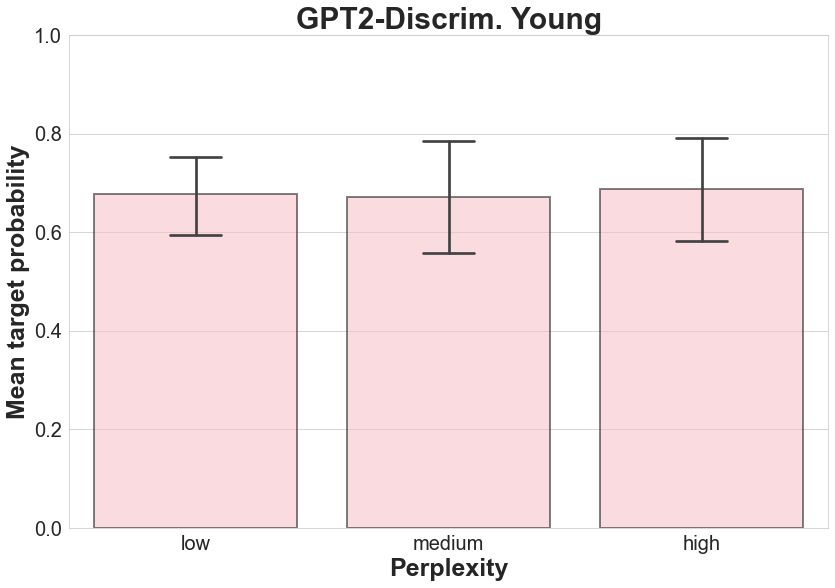

In [47]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.boxplot(data=gpt2_disc_np_y, x='perplexity', y='young_prob')

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")

# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-Discrim. Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()

# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_gpt2_disc_np_y.png")

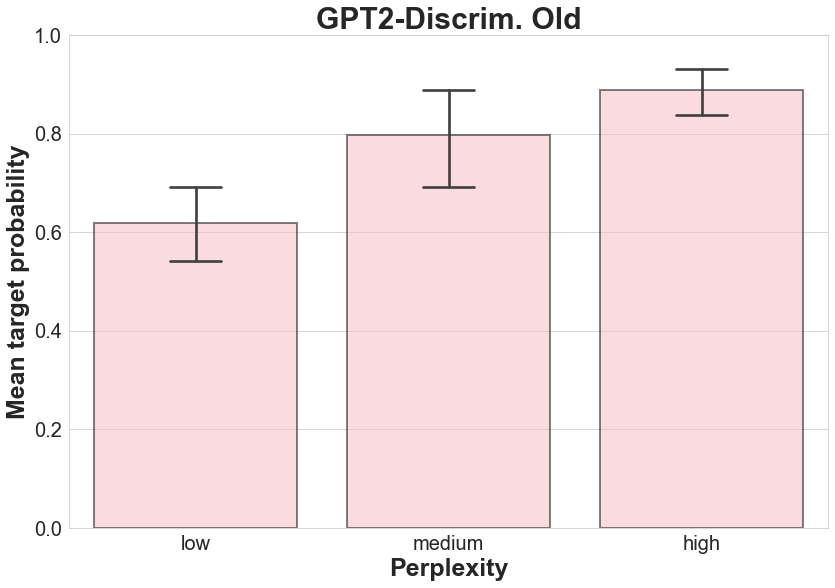

In [48]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-Discrim. Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()
# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_gpt2_disc_np_o.png")

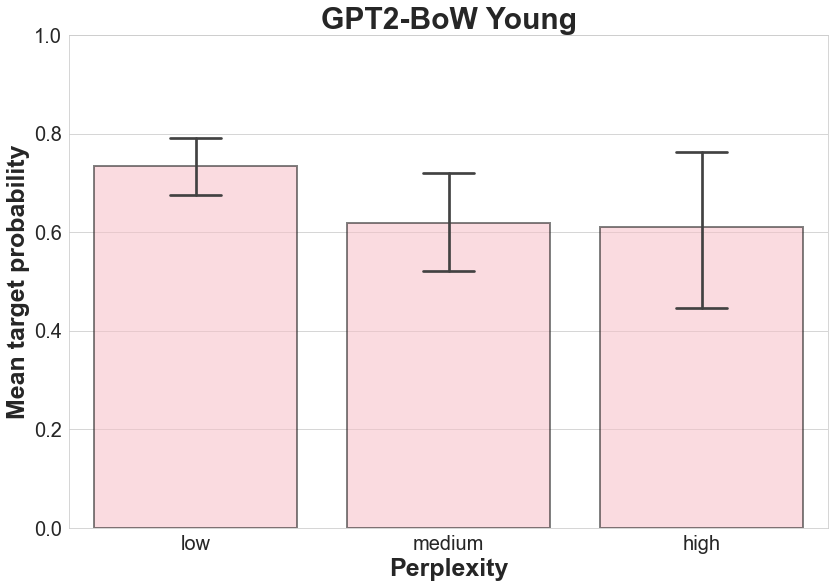

In [49]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-BoW Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()

# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_gpt2_bow_fb_np_y.png")

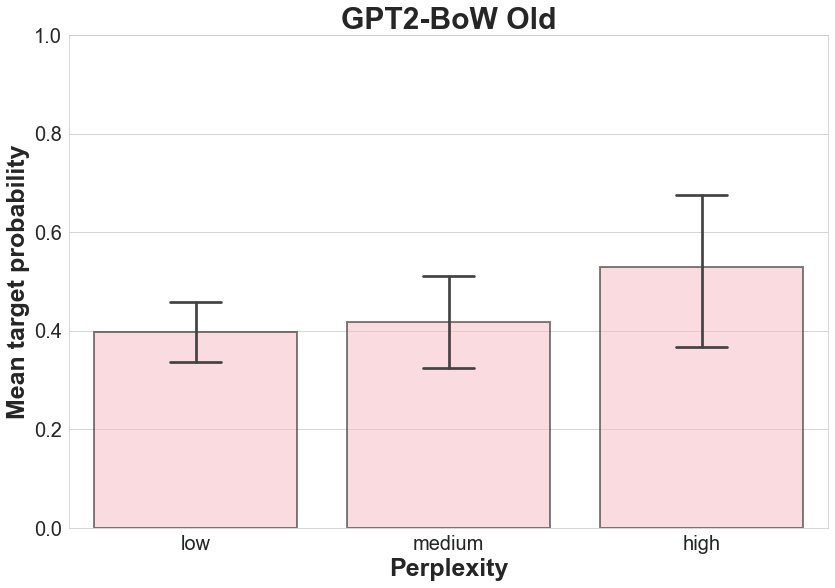

In [50]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-BoW Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()

# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_gpt2_bow_fb_np_o.png")

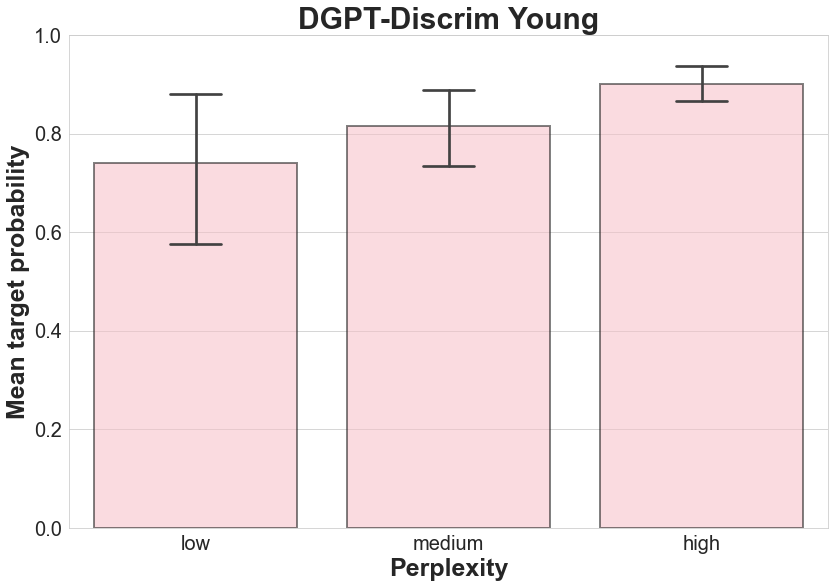

In [51]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")
# sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")
# 
# sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-Discrim Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()

# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_dgpt_disc_np_y.png")

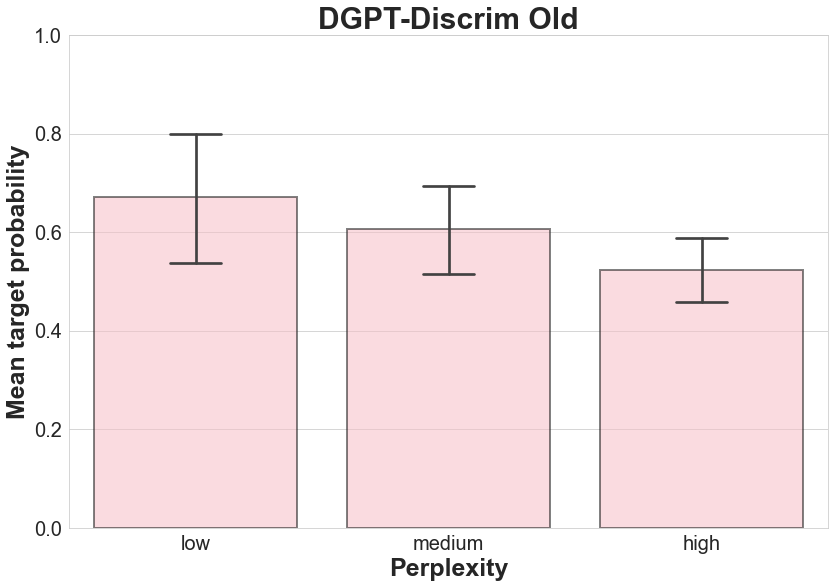

In [52]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")
# 
# sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-Discrim Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()

# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_dgpt_disc_np_o.png")

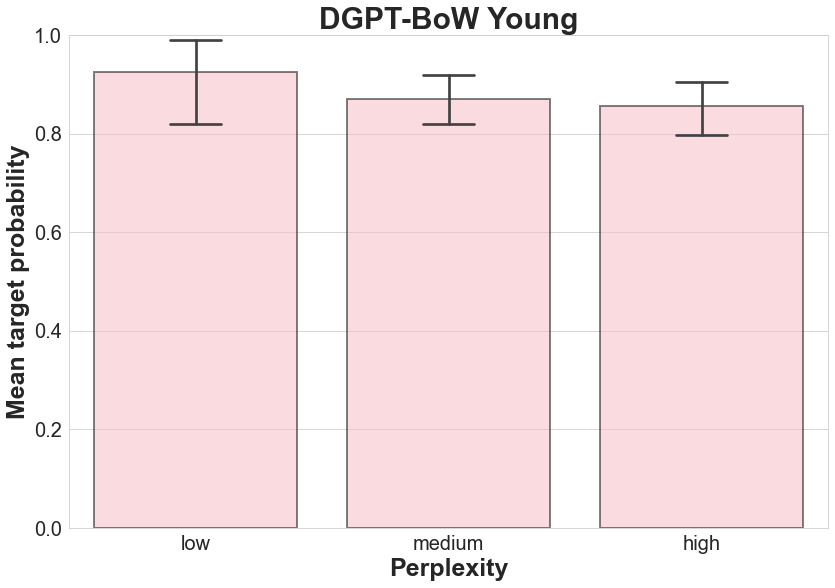

In [53]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")
# 
sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")
# sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-BoW Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()

# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_dgpt_bow_miu_np_y.png")

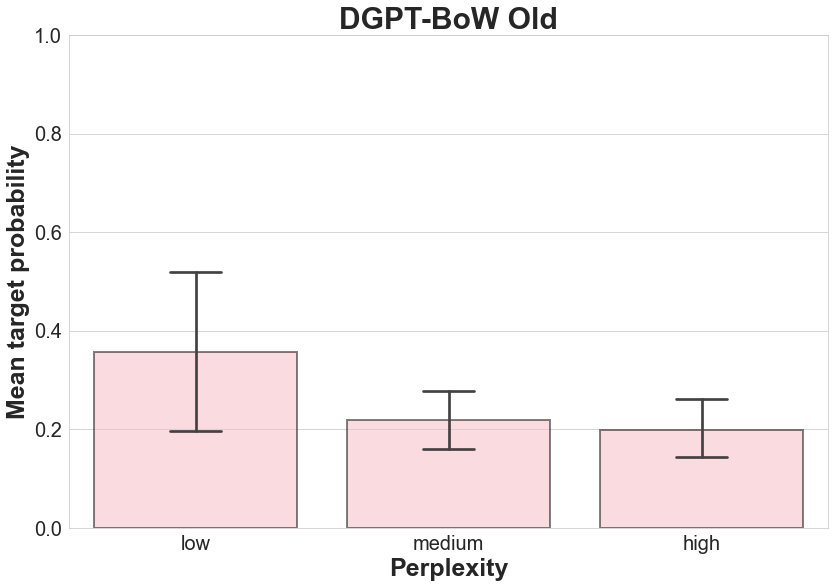

In [54]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")
# 
# sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink", ci=CI, alpha=0.55, linewidth=2, edgecolor="0.1")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-BoW Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("Perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("Mean target probability", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.tight_layout()
# plt.savefig(f"../figures/fluency_control/barplot_ppl_target_prob_dgpt_bow_miu_np_o.png")

In [ ]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

In [ ]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")
sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct')

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()